In [ ]:
import keras
keras.__version__

'2.4.3'

In [ ]:
from keras.datasets import fashion_mnist

(X_train, y_train),(X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
print(len(X_train))
print(X_train.shape)

print(len(y_train))
print(y_train[:5])

60000
(60000, 28, 28)
60000
[9 0 0 3 0]


In [ ]:
print(len(X_test))
print(X_test.shape)

print(len(y_test))
print(y_test[:5])

10000
(10000, 28, 28)
10000
[9 2 1 1 6]


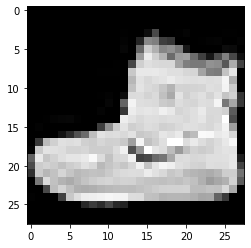

In [ ]:
import matplotlib.pyplot as plt

digit = X_train[0]
plt.imshow(digit, cmap='gray')
plt.show()

In [ ]:
import numpy as np

np.set_printoptions(linewidth=150)

print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 22

In [ ]:
X_train = X_train.reshape((60000, 28*28))  
X_test = X_test.reshape((10000, 28*28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [ ]:
X_train = X_train.astype(float)/255
X_test = X_test.astype(float)/255

print(X_train[0])

[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0. 

In [ ]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train[:5])
print(y_train.shape)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(60000, 10)


# L2

In [ ]:
from keras import models
from keras import layers
from keras import regularizers

L2 = models.Sequential()
L2.add(layers.Dense(512, activation='relu', input_shape=(28*28,), 
                       kernel_regularizer = regularizers.l2(0.00001)))
L2.add(layers.Dense(256, activation='relu',
                       kernel_regularizer = regularizers.l2(0.00001)))
L2.add(layers.Dense(10, activation='softmax'))
L2.summary()

Hist_L2 = L2.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

ex = EarlyStopping(monitor='val_accuracy', mode='max', patience=150, verbose = 1)
mc = ModelCheckpoint('best-L2.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)

%time
Hist_L2 = L2.fit(X_train, y_train, epochs=500, batch_size=128, validation_split=0.2, callbacks=[ex, mc], verbose=1)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.96 µs
Epoch 1/500
375/375 [==============================] - 5s 6ms/step - loss: 0.7927 - accuracy: 0.7196 - val_loss: 0.4124 - val_accuracy: 0.8521

Epoch 00001: val_accuracy improved from -inf to 0.85208, saving model to best-DR_BN.h5
Epoch 2/500
375/375 [==============================] - 2s 5ms/step - loss: 0.4153 - accuracy: 0.8486 - val_loss: 0.3720 - val_accuracy: 0.8718

Epoch 00002: val_accuracy improved from 0.85208 to 0.87183, saving model to best-DR_BN.h5
Epoch 3/500
375/375 [==============================] - 2s 5ms/step - loss: 0.3626 - accuracy: 0.8701 - val_loss: 0.3526 - val_accuracy: 0.8736

Epoch 00003: val_accuracy improved from 0.87183 to 0.87358, saving model to best-DR_BN.h5
Epoch 4/500
375/375 [==============================] - 2s 5ms/step - loss: 0.3311 - accuracy: 0.8816 - val_loss: 0.4462 - val_accuracy: 0.8447

Epoch 00004: val_accuracy did not improve from 0.87358
Epoch 5/500
375/375 [=============

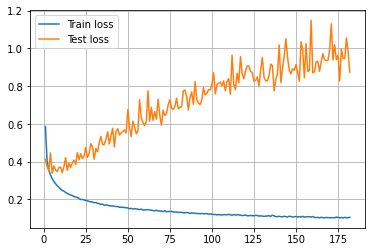

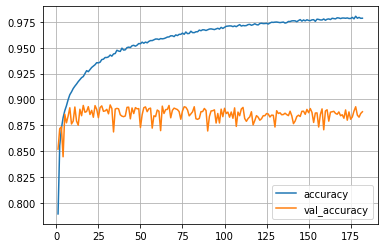

In [76]:
import matplotlib.pyplot as plt


epochs = range(1, len(Hist_L2.history['loss'])+1)





plt.plot(epochs, Hist_L2.history['loss'])
plt.plot(epochs, Hist_L2.history['val_loss'])
plt.legend(['Train loss','Test loss'])
plt.grid()
plt.show()



plt.plot(epochs, Hist_L2.history['accuracy'])
plt.plot(epochs, Hist_L2.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.grid()



In [ ]:
loss_L2, accuracy_L2 = L2.evaluate(X_test, y_test)
print('Loss = {:.5f}'.format(loss_L2))
print('Accuracy = {:.5f}'.format (accuracy_L2))

313/313 [==============================] - 1s 3ms/step - loss: 0.9960 - accuracy: 0.8863
Loss = 0.99603
Accuracy = 0.88630


# L2 + Batch Normal

In [ ]:
L2_BN = models.Sequential()
L2_BN.add(layers.Dense(512, input_shape=(28*28,),
                       kernel_regularizer=regularizers.l2(0.00001)))
L2_BN.add(layers.BatchNormalization())
L2_BN.add(layers.Activation('relu'))
L2_BN.add(layers.Dense(256,
                       kernel_regularizer=regularizers.l2(0.00001)))
L2_BN.add(layers.BatchNormalization())
L2_BN.add(layers.Activation('relu'))
L2_BN.add(layers.Dense(10, activation='softmax'))

L2_BN.summary()

L2_BN.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])




Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)               

In [ ]:
ex = EarlyStopping(monitor='val_accuracy', mode='max', patience=100, verbose = 1)
mc = ModelCheckpoint('best-L2_BN.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)

%time
Hist_L2_BN = L2_BN.fit(X_train, y_train, epochs=500, batch_size=128, validation_split=0.2, callbacks=[ex, mc], verbose=1)

375/375 [==============================] - 4s 7ms/step - loss: 0.5669 - accuracy: 0.7990 - val_loss: 0.4579 - val_accuracy: 0.8398

Epoch 00001: val_accuracy improved from -inf to 0.83983, saving model to best-DR_BN.h5
Epoch 2/500
375/375 [==============================] - 2s 6ms/step - loss: 0.3436 - accuracy: 0.8761 - val_loss: 0.3962 - val_accuracy: 0.8580

Epoch 00002: val_accuracy improved from 0.83983 to 0.85800, saving model to best-DR_BN.h5
Epoch 3/500
375/375 [==============================] - 2s 6ms/step - loss: 0.2864 - accuracy: 0.8977 - val_loss: 0.3918 - val_accuracy: 0.8637

Epoch 00003: val_accuracy improved from 0.85800 to 0.86367, saving model to best-DR_BN.h5
Epoch 4/500
375/375 [==============================] - 2s 7ms/step - loss: 0.2634 - accuracy: 0.9075 - val_loss: 0.4183 - val_accuracy: 0.8615

Epoch 00004: val_accuracy did not improve from 0.86367
Epoch 5/500
375/375 [==============================] - 2s 7ms/step - loss: 0.2431 - accuracy: 0.9140 - val_loss: 0

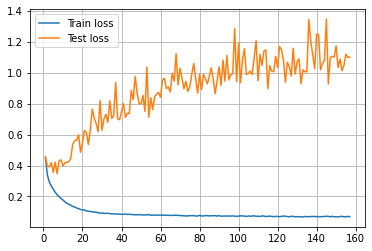

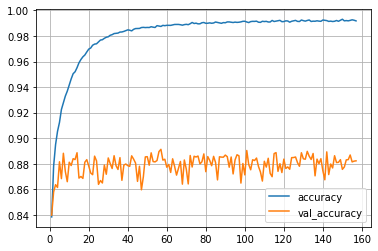

In [75]:
epochs = range(1, len(Hist_L2_BN.history['loss'])+1)





plt.plot(epochs, Hist_L2_BN.history['loss'])
plt.plot(epochs, Hist_L2_BN.history['val_loss'])
plt.legend(['Train loss','Test loss'])
plt.grid()
plt.show()



plt.plot(epochs, Hist_L2_BN.history['accuracy'])
plt.plot(epochs, Hist_L2_BN.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.grid()


plt.show()


In [ ]:
loss_L2_BN, accuracy_L2_BN = L2_BN.evaluate(X_test, y_test)
print('Loss = {:.5f}'.format(loss_L2_BN))
print('Accuracy = {:.5f}'.format (accuracy_L2_BN))

313/313 [==============================] - 1s 3ms/step - loss: 1.1495 - accuracy: 0.8781
Loss = 1.14954
Accuracy = 0.87810


# Dropout + Batch Normal

In [ ]:
DR_BN = models.Sequential()

DR_BN.add(layers.Dense(512, input_shape=(28*28,)))
DR_BN.add(layers.BatchNormalization())
DR_BN.add(layers.Activation('relu'))
DR_BN.add(layers.Dropout(0.4))
DR_BN.add(layers.Dense(256))
DR_BN.add(layers.BatchNormalization())

DR_BN.add(layers.Activation('relu'))
DR_BN.add(layers.Dropout(0.4))
DR_BN.add(layers.Dense(10, activation='softmax'))

DR_BN.summary()

DR_BN.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)               1024      
_________________________________________________________________
activation_3 (Activation)    (None, 256)              

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=100, verbose = 1)
mc = ModelCheckpoint('best-DR_BN.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)

%time
Hist_DR_BN = DR_BN.fit(X_train, y_train, epochs=500, batch_size=128, validation_split=0.2, callbacks=[es, mc], verbose=1)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 6.44 µs
Epoch 1/500
375/375 [==============================] - 4s 7ms/step - loss: 0.6970 - accuracy: 0.7589 - val_loss: 0.4778 - val_accuracy: 0.8348

Epoch 00001: val_accuracy improved from -inf to 0.83483, saving model to best-DR_BN.h5
Epoch 2/500
375/375 [==============================] - 2s 7ms/step - loss: 0.4238 - accuracy: 0.8473 - val_loss: 0.4133 - val_accuracy: 0.8481

Epoch 00002: val_accuracy improved from 0.83483 to 0.84808, saving model to best-DR_BN.h5
Epoch 3/500
375/375 [==============================] - 2s 7ms/step - loss: 0.3814 - accuracy: 0.8605 - val_loss: 0.4075 - val_accuracy: 0.8597

Epoch 00003: val_accuracy improved from 0.84808 to 0.85975, saving model to best-DR_BN.h5
Epoch 4/500
375/375 [==============================] - 2s 7ms/step - loss: 0.3532 - accuracy: 0.8711 - val_loss: 0.3583 - val_accuracy: 0.8735

Epoch 00004: val_accuracy improved from 0.85975 to 0.87350, saving model to best-DR_BN.h5

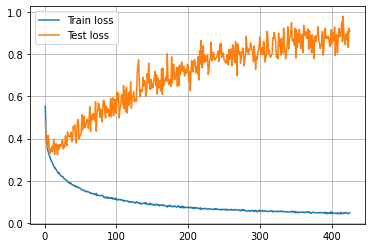

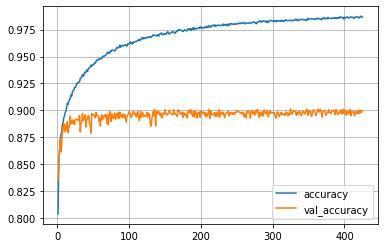

In [77]:

epochs = range(1, len(Hist_DR_BN.history['loss'])+1)





plt.plot(epochs, Hist_DR_BN.history['loss'])
plt.plot(epochs, Hist_DR_BN.history['val_loss'])
plt.legend(['Train loss','Test loss'])
plt.grid()
plt.show()



plt.plot(epochs, Hist_DR_BN.history['accuracy'])
plt.plot(epochs, Hist_DR_BN.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.grid()


plt.show()


In [ ]:
loss_DR_BN, accuracy_DR_BN = DR_BN.evaluate(X_test, y_test)
print('Loss = {:.5f}'.format(loss_DR_BN))
print('Accuracy = {:.5f}'.format (accuracy_DR_BN))

# accuracy 90찍을 뻔 했는데.. epoch(학습량)를 늘려야 했나?? 아님, 

313/313 [==============================] - 1s 3ms/step - loss: 0.9164 - accuracy: 0.8959
Loss = 0.91640
Accuracy = 0.89590


# 비교

In [ ]:
print('L2 Loss = {:.5f}, L2 Accuracy = {:.5f}'.format(loss_L2, accuracy_L2))
print('L2 + BatchNormal Loss = {:.5f}, L2 + BatchNormal Accuracy = {:.5f}'.format(loss_L2_BN, accuracy_L2_BN ))
print('Dropout + BatchNormal Loss = {:.5f}, Dropout + BatchNormal Accuracy = {:.5f}'.format(loss_DR_BN, accuracy_DR_BN))

L2 Loss = 0.99603, L2 Accuracy = 0.88630
L2 + BatchNormal Loss = 1.14954, L2 + BatchNormal Accuracy = 0.87810
Dropout + BatchNormal Loss = 0.91640, Dropout + BatchNormal Accuracy = 0.89590


In [ ]:
df_result = pd.DataFrame({
                          "Model" : ['Default', 'BN', 'BN + Dropout'],
                          "Accuracy" : [accuracy1, accuracy2, accuracy3],
                          "Val_Loss" : [loss1, loss2, loss3]})
                          
df_result.sort_values(by=['Accuracy'], axis=0, ascending=False)